# Assignment 5: PCA, Clustering, and Deep Learning
### CS 4262/5262 (Foundations of Machine Learning)<br><br>Vanderbilt University, Spring 2022<br><br>Due: check it on Brightspace

**Student Name:** Keshvi Mahalingam

This assignment has three parts, involving: (1) PCA, (2) clustering, and (3) deep learning. 



In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

--- 
## Part 1: Eigencats


In this part, you will be working with a dataset of cat images. You will apply principal component analysis (PCA) to decompose the data into "eigencats", and use the eigencat basis to form low-dimensional approximations of the original data.

- Load the cat dataset from the file "cats.csv" (provided for download on Brightspace; here is the original source: https://github.com/bioramble/pca). This dataset consists of a 4096 x 80 matrix of "pre-flattened" 64 x 64 images of cats (i.e., each of eighty 64 x 64 image has been flattened into a vector of length 4096).
- A function for loading the dataset has been provided below, so you just need to call it.


In [2]:
# code for loading dataset into matrix
# returns a matrix where each of the 80 rows represents a cat image 
# and the 4096 columns represent features (pixels) of the images
def load_cat_file(file_path):
    cat_matrix = np.zeros((80,4096))
    with open(file_path) as f:
        cat_reader = csv.reader(f, delimiter=',')
        for i, line in enumerate(cat_reader):
            pixels = [int(p) for p in line]
            cat_matrix[:,i] = pixels
    return cat_matrix
            
cat_matrix = load_cat_file('cat.csv')

- The next block of code provides a function for visualizing a single cat image, given a flattened image as input.
   


In [3]:
# function for visualizing a cat image
def vis_cat_image(cat_vec, axis=None):
    cat_img = np.reshape(cat_vec, (64,64)).T 
    if axis is None:
        plt.imshow(cat_img, interpolation='nearest')
        plt.show()
    else: 
        axis.imshow(cat_img, interpolation='nearest')

 * To familiarize yourself with the data, use the function above to display a single cat image of your choosing.
   

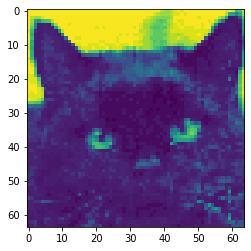

In [4]:
vis_cat_image(cat_matrix[24])

* Next, display the average over all 80 cat images:

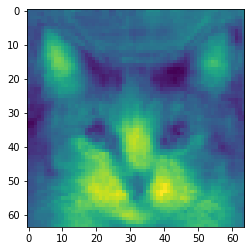

In [5]:
vis_cat_image(np.mean(cat_matrix, axis=0))

You will next perform PCA on the cat dataset to extract a set of "eigencats".
- Recall that it is important to perform feature scaling prior to PCA. First, please mean-center and standardize over features in the cat dataset.
- Next, calculate the eigenvectors and eigenvalues of the covariance matrix. **Do not use PCA from scikit-learn**, but you can use numpy functions. Please be sure to read and understand the documentation of those functions. 
- Display (as images) the top 16 "eigencats" (i.e., the 16 eigenvectors corresponding to the largest 16 eigenvalues). You can use the function `vis_cat_image` above. Place a title on each image that indicates which of the eigencats is displayed, where 'eigencat 1' corresponds to the largest eigenvalue and 'eigencat 16' corresponds to the 16th-largest eigenvalue.
- Display a plot of the eigenvalues, ordered from largest to smallest. Include a title and label the axes.

In [6]:
from scipy import linalg as LA
import seaborn as sns

# center and scale dataset
cat_mean = np.mean(cat_matrix, axis=0)
cat_matrix_centered = cat_matrix - cat_mean
cat_std = np.std(cat_matrix)
cat_matrix_scaled = cat_matrix_centered / cat_std

Eigencat # 1


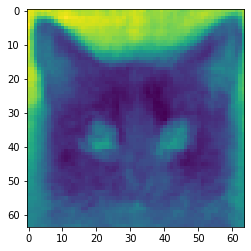

Eigencat # 2


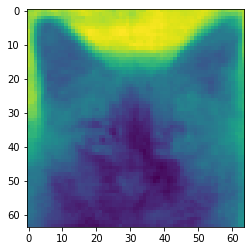

Eigencat # 3


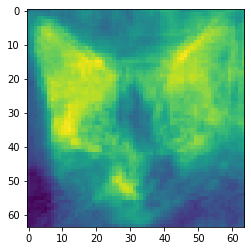

Eigencat # 4


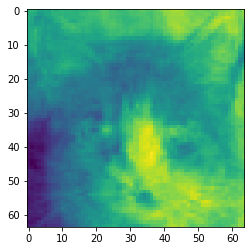

Eigencat # 5


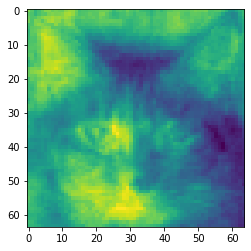

Eigencat # 6


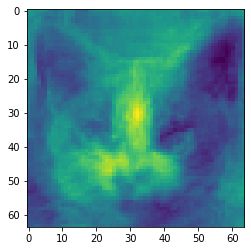

Eigencat # 7


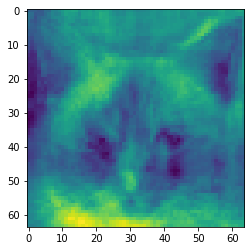

Eigencat # 8


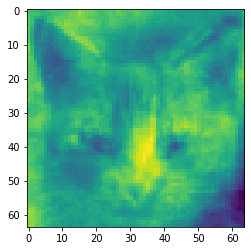

Eigencat # 9


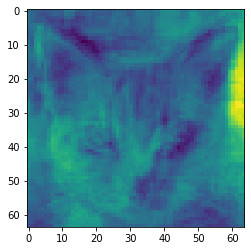

Eigencat # 10


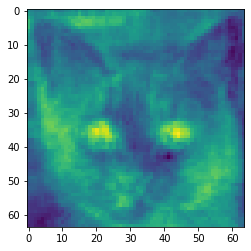

Eigencat # 11


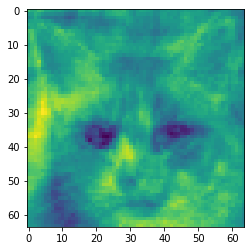

Eigencat # 12


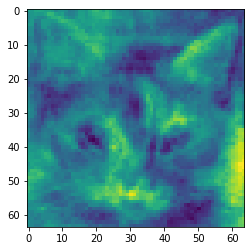

Eigencat # 13


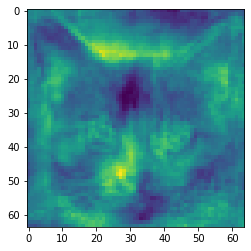

Eigencat # 14


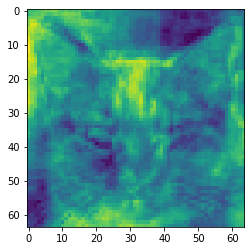

Eigencat # 15


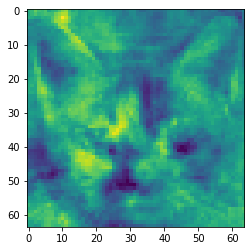

Eigencat # 16


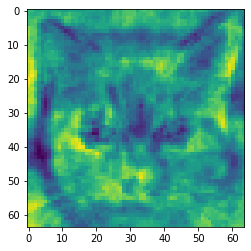

In [7]:
def pca(X):
    cov = np.cov(X.T)
    vals, vecs = LA.eigh(cov)
    return np.array(vals), np.array(vecs)

def display_top_n(vecs, n):
    for i in range(n):
        print("Eigencat #", i+1)
        plt.figure()
        vis_cat_image(np.real(vecs[i]))
         
def display_eigenvals(vals, n):
    plt.figure()
    plt.xlabel("# of Principal Components")
    plt.ylabel("Eigenvalue")
    sns.scatterplot(x=np.array(list(range(n))), y=vals[:n]).set(title="# of Principal Components vs Eigenvalues")
    plt.show()

# perform PCA
all_vals, all_vecs = pca(cat_matrix_scaled)

# sort eigenvalues and eigenvectors
vals_sorted, vecs_sorted = zip(*sorted(zip(all_vals, all_vecs.T), reverse=True))

# display top 16 eigencats
display_top_n(vecs_sorted, 16)

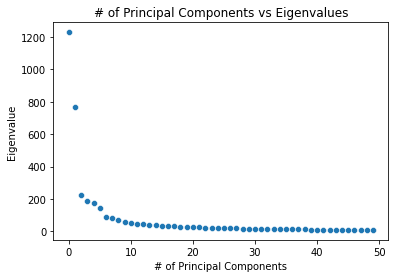


Variance explained by each PC: 
[ 3.10188142e-01  1.93032530e-01  5.69626382e-02 ... -1.49231803e-17
 -3.88720063e-17 -7.26880706e-17]

Variance explained by the first 29 PCs:  0.9077809298266158


In [8]:
# display top 50 eigenvals
display_eigenvals(vals_sorted, 50)

# calculate variance explained
ve = vals_sorted / np.sum(vals_sorted)
print("\nVariance explained by each PC: ")
print(ve)

print("\nVariance explained by the first 29 PCs: ", np.sum(ve[:30]))

Now, you will use your eigencats to form a low-dimensional approximation of the data. Each original (scaled) cat image can be approximated by a weighted sum of eigencats, where the weight associated with the $i^{th}$ eigencat corresponds to the projection of the original cat image onto the $i^{th}$ eigencat. Since the eigencats have norm = 1 (you can verify this!), the projection of an image onto each eigencat is simply the inner product between the image and the eigencat.

- Select an image of your choice from the original (scaled) dataset. 
   * Calculate the projection of this image onto the set of all principal components. This will result in a vector of length 4096, whose entries correspond to weights associated with each eigencat.
   * Reconstruct the image from the set of *all* principal components. Display the resulting image.
   * Reconstruct the image using only 1,2,8,16, and 32 principal components. Display all resulting images.
- Repeat the above steps using another randomly selected image.


In [9]:
def reconstruct(cat_vec, n):
    cat_proj = [0]*4096
    
    for i in range (n):  
        cat_proj[i] = np.inner(cat_vec, vecs_sorted[i])
        
    image = np.matmul(cat_proj, vecs_sorted)
    vis_cat_image(image)

Cat # 38  w/  4096  PCs


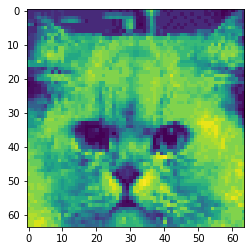

Cat # 38  w/  1  PCs


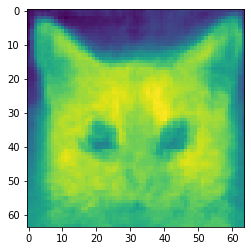

Cat # 38  w/  2  PCs


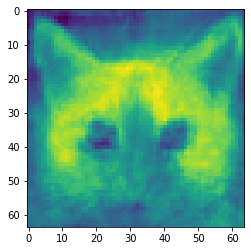

Cat # 38  w/  8  PCs


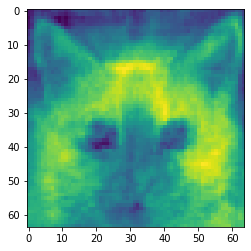

Cat # 38  w/  16  PCs


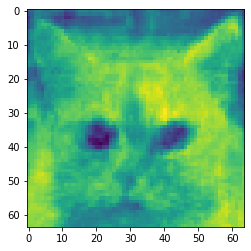

Cat # 38  w/  32  PCs


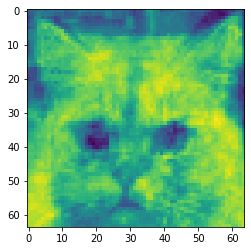

Cat # 46  w/  4096  PCs


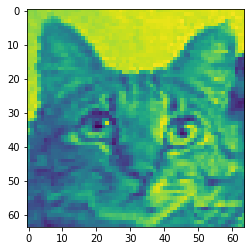

Cat # 46  w/  1  PCs


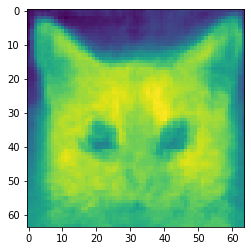

Cat # 46  w/  2  PCs


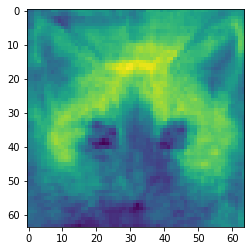

Cat # 46  w/  8  PCs


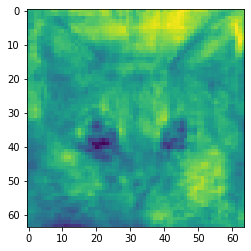

Cat # 46  w/  16  PCs


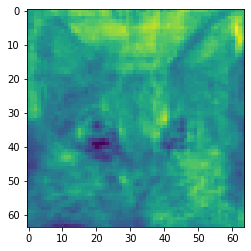

Cat # 46  w/  32  PCs


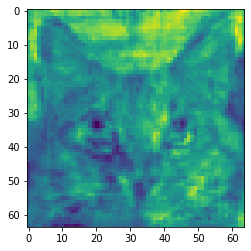

In [10]:
# display reconstructed cat images
for i in [38, 46]:
    for n in [4096, 1, 2, 8, 16, 32]:
        print("Cat #", i, " w/ ", n, " PCs")
        reconstruct(cat_matrix[i], n)


**Question 1** Write down some of your observations about the appearance of the eigencats.

The features of the eigencats are mostly blurred, but the contrast in pigmentation allows us to make out the general shapes of their heads, ears, and eyes.

**Question 2** What happens to the reconstructed image as you include more and more principal components?

The reconstructed eigencat image becomes increasingly more defined as the number of principal components increases. Increasing the number of principal components brings the reconstructed image closer and closer to how the original image looks.


--- 
## Part 2: Clustering


In this part, we will perform clustering on the cat images using k-means. Since the images are quite high-dimensional (4096 dimensions), we will use PCA to project the data into a lower-dimensional space prior to clustering. 

**Question 3**  Based on your analysis in Part 1, how many principal components are needed to explain 90% of the variance in the data?

According to my principal component analysis in Part 1, 29 principal components are needed to explain 90% of the variance in the cat image data.

- Project each cat image onto the set of $L$ eigencats that capture 90% variance in the data. Now, each image is represented by $L$ coordinates (i.e., its projection onto $L$ eigencats) instead of 4096.
- Perform k-means clustering on the resulting vectors, using K=4. You may use functions from scikit-learn.
- This results in 4 cluster centroids. Project those cluster centroids back into the original (4096-dimensional) space, and display each of those 4 centroid cats using the function `viz_cat_image` above.

Centroid # 1


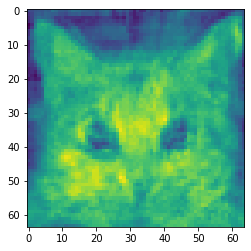

Centroid # 2


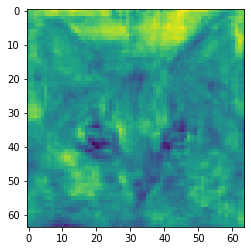

Centroid # 3


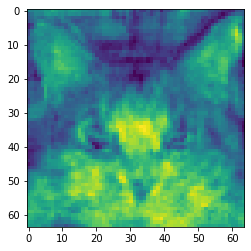

Centroid # 4


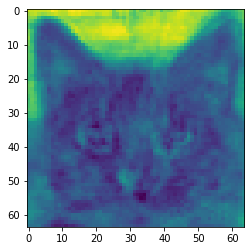

In [11]:
from sklearn.cluster import KMeans

cat_vec_29 = np.array(vecs_sorted[0:29])

# reduce features
cat_matrix_reduced = []
for cat in cat_matrix:
    cat_matrix_reduced.append(np.matmul(cat, cat_vec_29.T))

# perform kmeans
kmeans_cat = KMeans(n_clusters=4).fit(cat_matrix_reduced)
cat_centroids = np.array(kmeans_cat.cluster_centers_)

# display centroids
for count, centroid in enumerate(cat_centroids):
    print("Centroid #", count+1)
    cat = np.matmul(centroid, cat_vec_29)
    vis_cat_image(cat)

--- 
## Part 3: Deep Learning for Sentiment Analysis

 

In this part, you will be using Keras/PyTorch to build a fully-connected, feed-forward neural network for sentiment analysis. The [dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) you will be working with contains 50,000 movie reviews from IMDB and the corresponding labels, where the label indicates whether the review was positive or negative. 

If you are using Kera, make sure you install the tensorflow at first since keras is just a wrapper API package for tensorflow

In [12]:
from keras.datasets import imdb 
from keras.models import Sequential
from keras.layers import Dense, Dropout

- To begin, run the code block below to load the training and test sets of IMDB data from Keras/PyTorch. Each review (sample) is represented as a sequence of integers, one integer for each word in that review, where the integer assigned to a given word corresponds to the index of that word in the vocabulary. Note that below, we will turn these samples into fixed-length binary vectors. 

In [13]:
# fetch dataset from keras (already has a 50/50 train/test split)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000, seed=113)

# concatenate the data (N = 50,000)
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# transform X such that every input is the same length 
## 1 if input x contains the word, 0 otherwise
## so, we are ignoring word frequency 
X_vec = np.zeros((50000,10000))
for i, x in enumerate(X):
    X_vec[i, x] = 1

# 80/20 train/test split
x_train = X_vec[:40000]
y_train = y[:40000]
x_test = X_vec[40000:]
y_test = y[40000:]

- Using the Keras/PyTorch framework, build a fully-connected, feed-forward neural network for the IMDB dataset. This network should take in the binary vector representations of movie reviews and predict the positive/negative sentiment of the reviews. 
    * ake advantage of Keras’ online documentation at (URL). Additional supplemental materials by the TA may be referenced, but should not be used as a template for your homework.
- Hint: use binary cross-entropy as your loss function. 
- **Submit a neural network that reaches >= 85% accuracy on the test set.**

In [14]:
model = Sequential()

# input layer
model.add(Dense(50, activation = "relu", input_shape=(10000, )))

# hidden layers
model.add(Dropout(0.3))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(50, activation = "relu"))

# output layer
model.add(Dense(1, activation = "sigmoid"))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
results = model.fit(x_train, y_train, epochs=2, batch_size=500, validation_data = (x_test, y_test))

# evaluate accuracy
print("Accuracy: ", np.mean(results.history["val_accuracy"]))


Epoch 1/2
80/80 [==============================] - 5s 54ms/step - loss: 0.4173 - accuracy: 0.8126 - val_loss: 0.2516 - val_accuracy: 0.9013
Epoch 2/2
80/80 [==============================] - 2s 29ms/step - loss: 0.2186 - accuracy: 0.9171 - val_loss: 0.2605 - val_accuracy: 0.8950
Accuracy:  0.8981499969959259


**Question 4** Specify the optimization method and activation function(s) that you used.

I used the ReLU activation function for the input and hidden layers, and the sigmoid activation method for the output layer. Additionally, I used the adam optimization method, which uses stochastic gradient descent.

**Question 5** Provide a brief reflection on the process by which you tweaked your network to improve its performance.

I tweaked the parameters for the fit() function, namely the epochs and batch_size parameters, until I reached an accuracy above 85%. I kept the epochs parameter set to a low value because I am working with a relatively large dataset and I didn't want to iterat over the entire thing too many times. I started with a batch size of 32. As I increased the batch size, I noticed that the model accuracy improved.

---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline. Below, please acknowledge your collaborators as well as any resources/references (beyond Keras and guides to Python syntax) that you have used in this assignment: